In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as sts
import dataframe_image as dfi
import math

In [2]:
pd.set_option('display.float_format', lambda x: '%.0f' % x)

In [3]:
# Es importante mencionar que esta base de datos proviene de la última actualización en el Banco de Información de Telecomunicaciones
# del IFT, consultado el 19 de agosto de 2022. 
# Por este motivo se incluye en este repositorio esa versión de la base de datos a efectos de que si desea replicar el 
# resultado, lo haga con este conjunto de datos, toda vez que la información en el BIT podría variar sin previo aviso.

ingresos = pd.read_csv('TD_INGRESOS_TELECOM_ITE_VA.csv', encoding ='Latin1')
ingresos

,FOLIO,ANIO,TRIM,FECHA,CONCESIONARIO,K_EMPRESA,EMPRESA,K_GRUPO,GRUPO,I_FIJO_MOVIL,INGRESOS_TOTAL_E,I_ANUAL_TRIM
0,100028,2021,1,15-mar-21,ADOLFO MERINO MEDINA,C0089,CABLEMAS,G004,GRUPO TELEVISA,Fijo,389669,Trimestral
1,100028,2021,2,15-jun-21,ADOLFO MERINO MEDINA,C0089,CABLEMAS,G004,GRUPO TELEVISA,Fijo,407900,Trimestral
2,100028,2021,3,15-sep-21,ADOLFO MERINO MEDINA,C0089,CABLEMAS,G004,GRUPO TELEVISA,Fijo,416000,Trimestral
3,100028,2021,4,15DEC2021,ADOLFO MERINO MEDINA,C0089,CABLEMAS,G004,GRUPO TELEVISA,Fijo,434431,Trimestral
4,100029,2021,1,15-mar-21,AGUSTIN PEREZ VIEYRA,C0009,AGUSTIN PEREZ VIEYRA,C009,AGUSTIN PEREZ VIEYRA,Fijo,797686.05,Trimestral
...,...,...,...,...,...,...,...,...,...,...,...,...
2456,999997,2014,4,15DEC2014,"MICRO SISTEMAS INTERNACIONAL, S.A. DE C.V.",C0384,MICROSISTEMAS INTERNACIONAL,C384,MICROSISTEMAS INTERNACIONAL,Fijo,NaN,Trimestral
2457,999997,2015,1,15-mar-15,"MICRO SISTEMAS INTERNACIONAL, S.A. DE C.V.",C0384,MICROSISTEMAS INTERNACIONAL,C384,MICROSISTEMAS INTERNACIONAL,Fijo,NaN,Trimestral
2458,999997,2015,2,15-jun-15,"MICRO SISTEMAS INTERNACIONAL, S.A. DE C.V.",C0384,MICROSISTEMAS INTERNACIONAL,C384,MICROSISTEMAS INTERNACIONAL,Fijo,"720,000.00",Trimestral
2459,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
ingresos['GRUPO'].unique()

array(['GRUPO TELEVISA', 'AGUSTIN PEREZ VIEYRA',
       'ARELY ISABEL GONGORA PECH', 'FRANCISCO GUERRA GARCIA',
       'GABRIEL BUTRON CHIAPA', 'GUILLERMO MEDELLIN MILAN',
       'GUILLERMO ZARATE GARCIA', 'ISALIA MORENO ZETINA',
       'JAIME SANCHEZ SANCHEZ', 'JESUS MIGUEL FERNANDEZ GUERRERO',
       'JOSE JULIAN SACRAMENTO GARZA', 'MANUEL LOPEZ AVILA',
       'MARCO ANTONIO ROSALES HERRERA', 'ROBERTO LOPEZ BRAVO',
       'SARA QUIROZ CHAPA', 'IUSACELL-UNEFÓN', 'LOGITEL', 'TV-K',
       'TELEFÓNICA', 'TELECAB', 'ULTRAVISION', 'STARGROUP', 'ALESTRA',
       'AXTEL', 'MEGACABLE-MCM', 'TELESISTEMAS PENINSULARES', 'GLOBALSAT',
       'TELECOM NACIONAL', 'TOTALPLAY', 'AXESAT', 'AIRECABLE', 'CABLECOM',
       'USA TELECOM', 'CODITEL', 'COMCAB', 'SINOTECA', 'MULTICOM',
       'COORDINADORA DE TV POR CABLE', 'TV OJO CALIENTE',
       'GTAC REDES DE FIBRA OPTICA', 'TRANSTELCO', 'AMÉRICA MÓVIL',
       'TELECABLE DE TICUL', 'EUTELSAT AMERICAS', 'TV REY',
       'CABLEVISION RED', 'MARCATEL', '

In [5]:
len(ingresos['GRUPO'].unique())

158

In [6]:
ingresos.columns

Index(['FOLIO', 'ANIO', 'TRIM', 'FECHA', 'CONCESIONARIO', 'K_EMPRESA',
       'EMPRESA', 'K_GRUPO', 'GRUPO', 'I_FIJO_MOVIL', 'INGRESOS_TOTAL_E',
       'I_ANUAL_TRIM'],
      dtype='object')

In [7]:
# seleccionamos columnas relevantes
variables_relevantes = ['ANIO','TRIM', 'CONCESIONARIO', 'EMPRESA', 'GRUPO', 'INGRESOS_TOTAL_E']

ingresos2 = ingresos[variables_relevantes]
ingresos2

,ANIO,TRIM,CONCESIONARIO,EMPRESA,GRUPO,INGRESOS_TOTAL_E
0,2021,1,ADOLFO MERINO MEDINA,CABLEMAS,GRUPO TELEVISA,389669
1,2021,2,ADOLFO MERINO MEDINA,CABLEMAS,GRUPO TELEVISA,407900
2,2021,3,ADOLFO MERINO MEDINA,CABLEMAS,GRUPO TELEVISA,416000
3,2021,4,ADOLFO MERINO MEDINA,CABLEMAS,GRUPO TELEVISA,434431
4,2021,1,AGUSTIN PEREZ VIEYRA,AGUSTIN PEREZ VIEYRA,AGUSTIN PEREZ VIEYRA,797686.05
...,...,...,...,...,...,...
2456,2014,4,"MICRO SISTEMAS INTERNACIONAL, S.A. DE C.V.",MICROSISTEMAS INTERNACIONAL,MICROSISTEMAS INTERNACIONAL,NaN
2457,2015,1,"MICRO SISTEMAS INTERNACIONAL, S.A. DE C.V.",MICROSISTEMAS INTERNACIONAL,MICROSISTEMAS INTERNACIONAL,NaN
2458,2015,2,"MICRO SISTEMAS INTERNACIONAL, S.A. DE C.V.",MICROSISTEMAS INTERNACIONAL,MICROSISTEMAS INTERNACIONAL,"720,000.00"
2459,NaN,NaN,NaN,NaN,NaN,NaN


In [8]:
# seleccionar sólo los registro de 2021
ingresos = ingresos2[ingresos2['ANIO']==2021]
ingresos

,ANIO,TRIM,CONCESIONARIO,EMPRESA,GRUPO,INGRESOS_TOTAL_E
0,2021,1,ADOLFO MERINO MEDINA,CABLEMAS,GRUPO TELEVISA,389669
1,2021,2,ADOLFO MERINO MEDINA,CABLEMAS,GRUPO TELEVISA,407900
2,2021,3,ADOLFO MERINO MEDINA,CABLEMAS,GRUPO TELEVISA,416000
3,2021,4,ADOLFO MERINO MEDINA,CABLEMAS,GRUPO TELEVISA,434431
4,2021,1,AGUSTIN PEREZ VIEYRA,AGUSTIN PEREZ VIEYRA,AGUSTIN PEREZ VIEYRA,797686.05
...,...,...,...,...,...,...
2444,2021,1,"BROCOMUNICACIONES MOVILES, S.A.P.I. DE C.V.",BROMOVIL,BROMOVIL,NaN
2445,2021,2,"BROCOMUNICACIONES MOVILES, S.A.P.I. DE C.V.",BROMOVIL,BROMOVIL,NaN
2446,2021,3,"BROCOMUNICACIONES MOVILES, S.A.P.I. DE C.V.",BROMOVIL,BROMOVIL,83434.44
2447,2021,4,"BROCOMUNICACIONES MOVILES, S.A.P.I. DE C.V.",BROMOVIL,BROMOVIL,237150.7


# Corrección de grupos de interés en el conjunto de datos

Con base en la información proporcionada por la Unidad de Competencia Económica respecto a los Grupos de Interés que tienen identificados, se realizaron los siguientes cambios al marco de datos de ingresos que estamos utilizando para el cálculo del umbral de pequeño operador; publicado en el BIT al 19 de agosto de 2022:

- Se incluye en el grupo de interés económico HISPASAT a la empresa AXESS NET.SOLUTIONS MEXICO, S.A. DE C.V.
- Se incluye en el grupo de interés económico GRUPO TELEVISA a la empresa GRUPO DE TELECOMUNICACIONES DE ALTA CAPACIDAD, S.A.P.I. DE C.V. (GTAC).
- Se incluye en el grupo de interés económico TRANSTELCO a la empresa MAXCOM TELECOMUNICACIONES, S.A.B. DE C.V.
- Se incluyen en el grupo de interés económico MVS las empresas: MVSTV y DSH.


In [9]:
# Primero HISPASAT
print(ingresos[ingresos['EMPRESA']=='AXESS'])
ingresos['GRUPO'] = ingresos['GRUPO'].replace(['AXESAT'],'HISPASAT')
ingresos[ingresos['EMPRESA']=='AXESS']

     ANIO  TRIM                             CONCESIONARIO EMPRESA   GRUPO  \
345  2021     2  AXESS NET.SOLUTIONS MEXICO, S.A. DE C.V.   AXESS  AXESAT   
346  2021     3  AXESS NET.SOLUTIONS MEXICO, S.A. DE C.V.   AXESS  AXESAT   
347  2021     4  AXESS NET.SOLUTIONS MEXICO, S.A. DE C.V.   AXESS  AXESAT   

    INGRESOS_TOTAL_E  
345         60667313  
346         68625291  
347         88628131  


<ipython-input-9-7dc6878566fb>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ingresos['GRUPO'] = ingresos['GRUPO'].replace(['AXESAT'],'HISPASAT')


,ANIO,TRIM,CONCESIONARIO,EMPRESA,GRUPO,INGRESOS_TOTAL_E
345,2021,2,"AXESS NET.SOLUTIONS MEXICO, S.A. DE C.V.",AXESS,HISPASAT,60667313
346,2021,3,"AXESS NET.SOLUTIONS MEXICO, S.A. DE C.V.",AXESS,HISPASAT,68625291
347,2021,4,"AXESS NET.SOLUTIONS MEXICO, S.A. DE C.V.",AXESS,HISPASAT,88628131


In [10]:
# Segundo Grupo Televisa
print(ingresos[ingresos['CONCESIONARIO']=='GRUPO DE TELECOMUNICACIONES DE ALTA CAPACIDAD, S.A.P.I. DE C.V.'])
ingresos['GRUPO'] = ingresos['GRUPO'].replace(['GTAC REDES DE FIBRA OPTICA'],'GRUPO TELEVISA')
ingresos[ingresos['EMPRESA']=='GTAC REDES DE FIBRA OPTICA']

     ANIO  TRIM                                      CONCESIONARIO  \
525  2021     1  GRUPO DE TELECOMUNICACIONES DE ALTA CAPACIDAD,...   
526  2021     2  GRUPO DE TELECOMUNICACIONES DE ALTA CAPACIDAD,...   
527  2021     3  GRUPO DE TELECOMUNICACIONES DE ALTA CAPACIDAD,...   
528  2021     4  GRUPO DE TELECOMUNICACIONES DE ALTA CAPACIDAD,...   

                        EMPRESA                       GRUPO INGRESOS_TOTAL_E  
525  GTAC REDES DE FIBRA OPTICA  GTAC REDES DE FIBRA OPTICA        228948471  
526  GTAC REDES DE FIBRA OPTICA  GTAC REDES DE FIBRA OPTICA        196098888  
527  GTAC REDES DE FIBRA OPTICA  GTAC REDES DE FIBRA OPTICA        355289838  
528  GTAC REDES DE FIBRA OPTICA  GTAC REDES DE FIBRA OPTICA        282197600  


<ipython-input-10-98df99182ec1>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ingresos['GRUPO'] = ingresos['GRUPO'].replace(['GTAC REDES DE FIBRA OPTICA'],'GRUPO TELEVISA')


,ANIO,TRIM,CONCESIONARIO,EMPRESA,GRUPO,INGRESOS_TOTAL_E
525,2021,1,"GRUPO DE TELECOMUNICACIONES DE ALTA CAPACIDAD,...",GTAC REDES DE FIBRA OPTICA,GRUPO TELEVISA,228948471
526,2021,2,"GRUPO DE TELECOMUNICACIONES DE ALTA CAPACIDAD,...",GTAC REDES DE FIBRA OPTICA,GRUPO TELEVISA,196098888
527,2021,3,"GRUPO DE TELECOMUNICACIONES DE ALTA CAPACIDAD,...",GTAC REDES DE FIBRA OPTICA,GRUPO TELEVISA,355289838
528,2021,4,"GRUPO DE TELECOMUNICACIONES DE ALTA CAPACIDAD,...",GTAC REDES DE FIBRA OPTICA,GRUPO TELEVISA,282197600


In [11]:
# Tercero Transtelco
print(ingresos[ingresos['CONCESIONARIO']=='MAXCOM TELECOMUNICACIONES, S.A.B. DE C.V.'])
ingresos['GRUPO'] = ingresos['GRUPO'].replace(['MAXCOM'],'TRANSTELCO')
ingresos[ingresos['EMPRESA']=='MAXCOM']

      ANIO  TRIM                              CONCESIONARIO EMPRESA   GRUPO  \
1820  2021     1  MAXCOM TELECOMUNICACIONES, S.A.B. DE C.V.  MAXCOM  MAXCOM   
1821  2021     2  MAXCOM TELECOMUNICACIONES, S.A.B. DE C.V.  MAXCOM  MAXCOM   
1822  2021     3  MAXCOM TELECOMUNICACIONES, S.A.B. DE C.V.  MAXCOM  MAXCOM   
1823  2021     4  MAXCOM TELECOMUNICACIONES, S.A.B. DE C.V.  MAXCOM  MAXCOM   

     INGRESOS_TOTAL_E  
1820        154326158  
1821        157745550  
1822        154123979  
1823        157402483  


<ipython-input-11-19fa40c9fb05>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ingresos['GRUPO'] = ingresos['GRUPO'].replace(['MAXCOM'],'TRANSTELCO')


,ANIO,TRIM,CONCESIONARIO,EMPRESA,GRUPO,INGRESOS_TOTAL_E
1820,2021,1,"MAXCOM TELECOMUNICACIONES, S.A.B. DE C.V.",MAXCOM,TRANSTELCO,154326158
1821,2021,2,"MAXCOM TELECOMUNICACIONES, S.A.B. DE C.V.",MAXCOM,TRANSTELCO,157745550
1822,2021,3,"MAXCOM TELECOMUNICACIONES, S.A.B. DE C.V.",MAXCOM,TRANSTELCO,154123979
1823,2021,4,"MAXCOM TELECOMUNICACIONES, S.A.B. DE C.V.",MAXCOM,TRANSTELCO,157402483


In [12]:
ingresos[ingresos['EMPRESA']=='DISH']

,ANIO,TRIM,CONCESIONARIO,EMPRESA,GRUPO,INGRESOS_TOTAL_E
1067,2021,1,"COMERCIALIZADORA DE FRECUENCIAS SATELITALES, S...",DISH,DISH-MVS,1373486398
1068,2021,2,"COMERCIALIZADORA DE FRECUENCIAS SATELITALES, S...",DISH,DISH-MVS,1298658657
1069,2021,3,"COMERCIALIZADORA DE FRECUENCIAS SATELITALES, S...",DISH,DISH-MVS,1264047268
1070,2021,4,"COMERCIALIZADORA DE FRECUENCIAS SATELITALES, S...",DISH,DISH-MVS,1211104115


In [13]:
# Quinto DISH-MVS
print(ingresos[ingresos['CONCESIONARIO']=='COMERCIALIZADORA DE FRECUENCIAS SATELITALES, S. DE R.L. DE C.V.'])
ingresos['GRUPO'] = ingresos['GRUPO'].replace(['DISH-MVS'],'MVS')
ingresos[ingresos['EMPRESA']=='DISH']

      ANIO  TRIM                                      CONCESIONARIO EMPRESA  \
1067  2021     1  COMERCIALIZADORA DE FRECUENCIAS SATELITALES, S...    DISH   
1068  2021     2  COMERCIALIZADORA DE FRECUENCIAS SATELITALES, S...    DISH   
1069  2021     3  COMERCIALIZADORA DE FRECUENCIAS SATELITALES, S...    DISH   
1070  2021     4  COMERCIALIZADORA DE FRECUENCIAS SATELITALES, S...    DISH   

         GRUPO INGRESOS_TOTAL_E  
1067  DISH-MVS       1373486398  
1068  DISH-MVS       1298658657  
1069  DISH-MVS       1264047268  
1070  DISH-MVS       1211104115  


<ipython-input-13-3309da2ae005>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ingresos['GRUPO'] = ingresos['GRUPO'].replace(['DISH-MVS'],'MVS')


,ANIO,TRIM,CONCESIONARIO,EMPRESA,GRUPO,INGRESOS_TOTAL_E
1067,2021,1,"COMERCIALIZADORA DE FRECUENCIAS SATELITALES, S...",DISH,MVS,1373486398
1068,2021,2,"COMERCIALIZADORA DE FRECUENCIAS SATELITALES, S...",DISH,MVS,1298658657
1069,2021,3,"COMERCIALIZADORA DE FRECUENCIAS SATELITALES, S...",DISH,MVS,1264047268
1070,2021,4,"COMERCIALIZADORA DE FRECUENCIAS SATELITALES, S...",DISH,MVS,1211104115


In [14]:
# Sexto DISH-MVS
print(ingresos[ingresos['EMPRESA']=='MVSTV'])
ingresos['GRUPO'] = ingresos['GRUPO'].replace(['MVSTV'],'MVS')
ingresos[ingresos['EMPRESA']=='MVSTV']

      ANIO  TRIM          CONCESIONARIO EMPRESA  GRUPO INGRESOS_TOTAL_E
1704  2021     1  COMBAND, S.A. DE C.V.   MVSTV  MVSTV       1854470.77
1705  2021     2  COMBAND, S.A. DE C.V.   MVSTV  MVSTV       1355173.22
1706  2021     3  COMBAND, S.A. DE C.V.   MVSTV  MVSTV       2842490.96
1707  2021     4  COMBAND, S.A. DE C.V.   MVSTV  MVSTV       5357193.15


<ipython-input-14-b827a2e0f14c>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ingresos['GRUPO'] = ingresos['GRUPO'].replace(['MVSTV'],'MVS')


,ANIO,TRIM,CONCESIONARIO,EMPRESA,GRUPO,INGRESOS_TOTAL_E
1704,2021,1,"COMBAND, S.A. DE C.V.",MVSTV,MVS,1854470.77
1705,2021,2,"COMBAND, S.A. DE C.V.",MVSTV,MVS,1355173.22
1706,2021,3,"COMBAND, S.A. DE C.V.",MVSTV,MVS,2842490.96
1707,2021,4,"COMBAND, S.A. DE C.V.",MVSTV,MVS,5357193.15


In [15]:
# Existen huecos en los datos públicos en proveedores importantes como Axtel (4T2021), Cablevisión, Virgin Mobile (4T2021), QBO CEL (2T Y 4T2021), por mencionar algunos.
ingresos[ingresos['INGRESOS_TOTAL_E'].isna()==True]
# no obstante, partimos de que es la información disponible para este ejercicio.

,ANIO,TRIM,CONCESIONARIO,EMPRESA,GRUPO,INGRESOS_TOTAL_E
267,2021,4,"AXTEL, S.A.B. DE C.V.",AXTEL,AXTEL,NaN
514,2021,2,"CABLEMAS TELECOMUNICACIONES, S.A. DE C.V.",IZZI,GRUPO TELEVISA,NaN
766,2021,2,"CABLEVISION RED, S.A. DE C.V.",CABLEVISION RED,GRUPO TELEVISA,NaN
838,2021,2,"TV CABLE DE ORIENTE, S.A. DE C.V.",IZZI,GRUPO TELEVISA,NaN
940,2021,2,"TELEVISION INTERNACIONAL, S.A. DE C.V.",TELEVISION INTERNACIONAL,GRUPO TELEVISA,NaN
1434,2021,2,"CABLEVISION, S.A. DE C.V.",CABLEVISION,GRUPO TELEVISA,NaN
1929,2021,4,"VIRGIN MOBILE MEXICO, S. DE R.L. DE C.V.",VIRGIN MOBILE,VIRGIN MOBILE,NaN
2010,2021,2,"KUBO CEL, S.A.P.I. DE C.V.",QBO CEL,QBO CEL,NaN
2012,2021,4,"KUBO CEL, S.A.P.I. DE C.V.",QBO CEL,QBO CEL,NaN
2151,2021,1,"COMNET, S.A. DE C.V.",COMNET,COMNET,NaN


In [16]:
ingresos.dtypes

ANIO                float64
TRIM                float64
CONCESIONARIO        object
EMPRESA              object
GRUPO                object
INGRESOS_TOTAL_E     object
dtype: object

In [17]:
# no consideremos los missing values

ingresos = ingresos[ingresos['INGRESOS_TOTAL_E'].isna()!=True]
ingresos

,ANIO,TRIM,CONCESIONARIO,EMPRESA,GRUPO,INGRESOS_TOTAL_E
0,2021,1,ADOLFO MERINO MEDINA,CABLEMAS,GRUPO TELEVISA,389669
1,2021,2,ADOLFO MERINO MEDINA,CABLEMAS,GRUPO TELEVISA,407900
2,2021,3,ADOLFO MERINO MEDINA,CABLEMAS,GRUPO TELEVISA,416000
3,2021,4,ADOLFO MERINO MEDINA,CABLEMAS,GRUPO TELEVISA,434431
4,2021,1,AGUSTIN PEREZ VIEYRA,AGUSTIN PEREZ VIEYRA,AGUSTIN PEREZ VIEYRA,797686.05
...,...,...,...,...,...,...
2442,2021,3,"MARKETING 358, S.A. DE C.V.",MARKETING 358,MARKETING 358,398927.16
2443,2021,4,"MARKETING 358, S.A. DE C.V.",MARKETING 358,MARKETING 358,1924097.07
2446,2021,3,"BROCOMUNICACIONES MOVILES, S.A.P.I. DE C.V.",BROMOVIL,BROMOVIL,83434.44
2447,2021,4,"BROCOMUNICACIONES MOVILES, S.A.P.I. DE C.V.",BROMOVIL,BROMOVIL,237150.7


In [18]:
lista_columnas = ['GRUPO', 'INGRESOS_TOTAL_E']
ingresos2 = ingresos[lista_columnas]
ingresos2

,GRUPO,INGRESOS_TOTAL_E
0,GRUPO TELEVISA,389669
1,GRUPO TELEVISA,407900
2,GRUPO TELEVISA,416000
3,GRUPO TELEVISA,434431
4,AGUSTIN PEREZ VIEYRA,797686.05
...,...,...
2442,MARKETING 358,398927.16
2443,MARKETING 358,1924097.07
2446,BROMOVIL,83434.44
2447,BROMOVIL,237150.7


In [19]:
ingresos2['INGRESOS_TOTAL_E'] = pd.to_numeric(ingresos2['INGRESOS_TOTAL_E'])

<ipython-input-19-0e8230c4d54c>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ingresos2['INGRESOS_TOTAL_E'] = pd.to_numeric(ingresos2['INGRESOS_TOTAL_E'])


In [20]:
# ya no tenemos missings

ingresos2.dtypes

GRUPO                object
INGRESOS_TOTAL_E    float64
dtype: object

In [21]:
# Agrupados
ingresos_agrupados = ingresos2.groupby(['GRUPO']).sum()
ingresos_agrupados

,INGRESOS_TOTAL_E
GRUPO,
ADDINTELI,5534961
AGUSTIN PEREZ VIEYRA,2726562
AIRECABLE,13327321
ALTAN,2834607753
AMÉRICA MÓVIL,338320139531
...,...
VERIZON SERVICIOS EMPRESARIALES MEXICO,258650617
VIRGIN MOBILE,146563495
WEEX,33446465


In [22]:
ingresos_agrupados = ingresos_agrupados.reset_index().sort_values(by=['INGRESOS_TOTAL_E'], ascending=False)
ingresos_agrupados

,GRUPO,INGRESOS_TOTAL_E
4,AMÉRICA MÓVIL,338320139531
36,GRUPO TELEVISA,59301496226
6,AT&T,55793781168
98,TELEFÓNICA,24871583943
60,MEGACABLE-MCM,24676771857
...,...,...
35,GRUPO CORPORATIVO ZUNUN PAZ,340986
100,TELMOVIL,332069
9,BROMOVIL,320585
23,EDUARDO PEDRERO PEREZ,68200


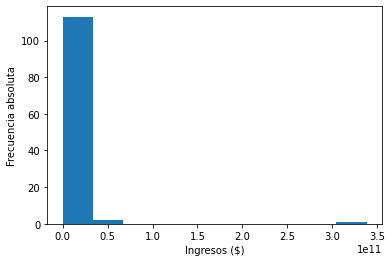

NormaltestResult(statistic=238.15581101258346, pvalue=1.928069666088079e-52)


In [23]:
plt.hist(ingresos_agrupados['INGRESOS_TOTAL_E'])
plt.xlabel('Ingresos ($)')
plt.ylabel('Frecuencia absoluta')
plt.show()
print(sts.normaltest(ingresos_agrupados['INGRESOS_TOTAL_E'])) # no pasa la prueba de normalidad (sesgo)

In [24]:
# cuántos ceros tenemos en las cifras
m = ingresos_agrupados[ingresos_agrupados['INGRESOS_TOTAL_E']!=0]

ingresos_agrupados_transformables = m

ingresos_agrupados_transformables

,GRUPO,INGRESOS_TOTAL_E
4,AMÉRICA MÓVIL,338320139531
36,GRUPO TELEVISA,59301496226
6,AT&T,55793781168
98,TELEFÓNICA,24871583943
60,MEGACABLE-MCM,24676771857
...,...,...
35,GRUPO CORPORATIVO ZUNUN PAZ,340986
100,TELMOVIL,332069
9,BROMOVIL,320585
23,EDUARDO PEDRERO PEREZ,68200


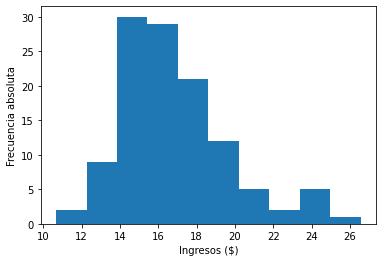

NormaltestResult(statistic=19.12498898738056, pvalue=7.03171739590705e-05)


In [25]:
# Aplicar logarítmos para reducir el efecto de la magnitud de los datos.
ln_ingresos = np.log(ingresos_agrupados_transformables['INGRESOS_TOTAL_E']) 

plt.hist(ln_ingresos)
plt.xlabel('Ingresos ($)')
plt.ylabel('Frecuencia absoluta')
plt.show()
print(sts.normaltest(ln_ingresos))

In [26]:
# Análisis de varianza
var_numpy = np.var(ln_ingresos, ddof = 0)
print(f"La varianza del ln de los ingresos totales en 2021 es de {var_numpy}")
print(f'Lo que implica $ {np.exp(var_numpy)}')

sd_numpy = np.std(ln_ingresos,ddof = 0)
print(f"La desviación estándar del ln de los ingresos totales en 2021 es de {sd_numpy}")
print(f'Lo que implica $ {np.exp(sd_numpy)}')

La varianza del ln de los ingresos totales en 2021 es de 8.286548415208602
Lo que implica $ 3970.1073563151735
La desviación estándar del ln de los ingresos totales en 2021 es de 2.878636554900358
Lo que implica $ 17.79000094683033


In [27]:
var_numpy2 = np.var(ingresos_agrupados['INGRESOS_TOTAL_E'], ddof = 0)
print(f"La varianza del ln de los ingresos totales en 2021 es de {var_numpy2}")

sd_numpy2 = np.std(ingresos_agrupados['INGRESOS_TOTAL_E'],ddof = 0)
print(f"La desviación estándar de los ingresos totales en 2021 es de {sd_numpy2}")


La varianza del ln de los ingresos totales en 2021 es de 1.0373849757817884e+21
La desviación estándar de los ingresos totales en 2021 es de 32208461245.17265


In [28]:
# La media
media = np.mean(ln_ingresos)
print(f"La media del ln de los ingresos 2021 es de {media}")
print(f'Lo que implica una media de $ {np.exp(media)}')

La media del ln de los ingresos 2021 es de 16.876571019213984
Lo que implica una media de $ 21350186.206439875


In [29]:
# Calculando la regla de 68-95-99.7 usando la desviación estándar:
print(f"Casi el 68% de los datos está entre {round(media-sd_numpy,3)} y {round(media+sd_numpy,3)}")
print(f'Lo que implica que el 68% de los operadores tienen ingresos entre {round(np.exp(media-sd_numpy),2)} y {round(np.exp(media+sd_numpy),2)}')
print(f"Casi el 95% de los datos está entre {round(media-2*sd_numpy,3)} y {round(media +2*sd_numpy,3)}")
print(f'Lo que implica que el 95% de los operadores tienen ingresos entre {round(np.exp(media-2*sd_numpy),2)} y {round(np.exp(media +2*sd_numpy),2)}')
print(f"Casi el 99.7% de los datos está entre {round(media-3*sd_numpy,3)} y {round(media+3*sd_numpy,3)}")
print(f'Lo que implica que el 99.7% de los operadores tienen ingresos entre {round(np.exp(media-3*sd_numpy),2)} y {round(np.exp(media +3*sd_numpy),2)}')


Casi el 68% de los datos está entre 13.998 y 19.755
Lo que implica que el 68% de los operadores tienen ingresos entre 1200122.83 y 379819832.83
Casi el 95% de los datos está entre 11.119 y 22.634
Lo que implica que el 95% de los operadores tienen ingresos entre 67460.53 y 6756995185.63
Casi el 99.7% de los datos está entre 8.241 y 25.512
Lo que implica que el 99.7% de los operadores tienen ingresos entre 3792.05 y 120206950750.04


In [30]:
# El score z nos dice el número de desviaciones estándar en el que un dato de ingreso está cerca de la media
z_scipy = sts.zscore(ln_ingresos)
print(f"Los score z es {z_scipy}")

Los score z es [ 3.35946801  2.75454341  2.73336251  2.45269614  2.44996444  2.42224358
  2.08948259  1.90624292  1.69823397  1.42227946  1.22655634  1.21114929
  1.17223751  1.13960329  1.09791125  1.033615    0.95147706  0.86652749
  0.80083652  0.776976    0.72278666  0.71691058  0.71389309  0.68195652
  0.66920511  0.57713694  0.529582    0.492777    0.48350637  0.47457978
  0.47347242  0.47063683  0.3466482   0.34041538  0.34041538  0.32752049
  0.24677569  0.2457676   0.22914791  0.22824258  0.21611638  0.19524039
  0.15593689  0.12950964  0.12595781  0.06486042  0.03715059  0.02512625
  0.02407649  0.02203962  0.01691373 -0.00610232 -0.01283765 -0.13367125
 -0.13863448 -0.14720463 -0.163704   -0.16598494 -0.16750832 -0.17423663
 -0.17439576 -0.18790852 -0.19028517 -0.20993631 -0.22722884 -0.24240511
 -0.32323577 -0.33194837 -0.34124606 -0.34605042 -0.37276338 -0.41136477
 -0.43955823 -0.46896366 -0.47283957 -0.51003327 -0.51867379 -0.52159124
 -0.55217502 -0.55941645 -0.58148777

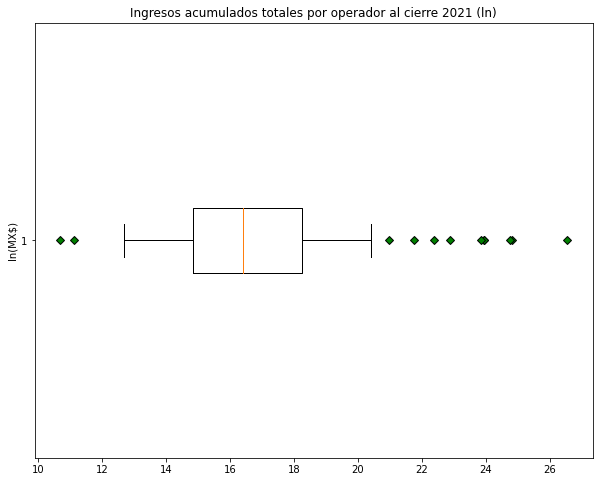

In [31]:
# Prueba de outliers (los grandes operadores)
green_diamond = dict(markerfacecolor='g', marker='D')
fig1, ax1 = plt.subplots(figsize=(10, 8))
ax1.set_title('Ingresos acumulados totales por operador al cierre 2021 (ln)')
ax1.set_ylabel('ln(MX$)')
ax1.boxplot(ln_ingresos, flierprops=green_diamond, whis=0.75, vert=False)
plt.savefig('criterio_2021.png')
plt.show()

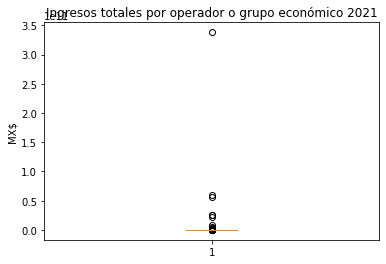

In [32]:
# Prueba de outliers (los grandes operadores)

fig1, ax1 = plt.subplots()
ax1.set_title('Ingresos totales por operador o grupo económico 2021')
ax1.set_ylabel('MX$')
ax1.boxplot(ingresos_agrupados['INGRESOS_TOTAL_E'])
plt.show()

In [33]:
# Análisis con quartiles y rango intercuantil para efectos de identificar los outliers

quartiles = ln_ingresos.quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq

print(f"El cuartil más bajo de los ingresos es: {lowerq}")
print(f"El cuartil más alto de los ingresos es: {upperq}")
print(f"El rango intercuantil de los ingresos es: {iqr}")
print(f"El ingreso medio es: {quartiles[0.5]} ")


lower_bound = lowerq - (1*iqr)
upper_bound = upperq + (1*iqr)
print(f"Valores por debajo {lower_bound} se consideran datos aberrantes.")
print(f"Valores por encima {upper_bound} se consideran datos aberrantes que no son elegibles para el Comité de Pequeños Operadores.")



El cuartil más bajo de los ingresos es: 14.827012396152982
El cuartil más alto de los ingresos es: 18.249137820449576
El rango intercuantil de los ingresos es: 3.4221254242965937
El ingreso medio es: 16.396568074822838 
Valores por debajo 11.404886971856389 se consideran datos aberrantes.
Valores por encima 21.67126324474617 se consideran datos aberrantes que no son elegibles para el Comité de Pequeños Operadores.


In [34]:
print(f'Los ingresos extremadamente grandes son aquellos que son mayores o iguales a $ {np.exp(upper_bound)}')

Los ingresos extremadamente grandes son aquellos que son mayores o iguales a $ 2580536718.6940727


In [52]:
# de la lista de operadores que tienen un ingreso menor al upper bound son:

# Los que quedan dentro del CPO
cpo = ingresos_agrupados_transformables[ingresos_agrupados_transformables['INGRESOS_TOTAL_E']<=2540419221.65867].sort_values(by=['INGRESOS_TOTAL_E'], ascending=False)
cpo.head(20)

,GRUPO,INGRESOS_TOTAL_E
84,STARGROUP,1280858832
68,OUI,729143370
56,MARCATEL,697511564
103,TRANSTELCO,623598170
26,EUTELSAT AMERICAS,567683561
43,HNS DE MEXICO,503481972
42,HISPASAT,418410240
107,UC TELECOM,330305215
111,VERIZON SERVICIOS EMPRESARIALES MEXICO,258650617
10,BT LATAM MEXICO,214085985


In [53]:
cpo.tail(15)

,GRUPO,INGRESOS_TOTAL_E
52,JOSE JULIAN SACRAMENTO GARZA,1533408
15,CABLEVISION DE LA HUACANA,1515931
21,CRO.NET,1425388
105,TV-K,1094570
69,QBO CEL,998133
91,TELECABLE DE MARIANO ESCOBEDO,568497
47,ISALIA MORENO ZETINA,497141
50,JAIME SANCHEZ SANCHEZ,474403
12,CABLE SISTEMA DEL CENTRO,474403
45,IGOU TELECOM,424046


In [36]:
len(cpo['GRUPO'])

107

In [37]:
no_cpo = ingresos_agrupados_transformables[ingresos_agrupados_transformables['INGRESOS_TOTAL_E']>2540419221.65867].sort_values(by=['INGRESOS_TOTAL_E'], ascending=False)
no_cpo

,GRUPO,INGRESOS_TOTAL_E
4,AMÉRICA MÓVIL,338320139531
36,GRUPO TELEVISA,59301496226
6,AT&T,55793781168
98,TELEFÓNICA,24871583943
60,MEGACABLE-MCM,24676771857
102,TOTALPLAY,22784126736
7,AXTEL,8742237448
62,MVS,5158705766
3,ALTAN,2834607753


In [38]:
# Gap entre el mejor ingreso en los CPO y el peor ingreso en los que son descartados de pertenecer a los CPO.

#brecha_ingreso = 
brecha_ingreso = no_cpo["INGRESOS_TOTAL_E"].min() - cpo["INGRESOS_TOTAL_E"].max()
print(f'El monto que separa al operador que tiene el mayor ingreso y que es elegible para pertencer al CPO y el que tiene el ingreso más bajo en cuanto a los descartados es de ${brecha_ingreso}')

El monto que separa al operador que tiene el mayor ingreso y que es elegible para pertencer al CPO y el que tiene el ingreso más bajo en cuanto a los descartados es de $1553748921.7600002


In [39]:
print(f'Esta brecha equivale al {(brecha_ingreso/np.exp(media))} veces de la media de la distribución')

Esta brecha equivale al 72.7744904300339 veces de la media de la distribución


# ¿Qué empresas son las elegibles en el conjunto de información disponible en el BIT-IFT?

In [40]:
ingresos = ingresos[['CONCESIONARIO', 'EMPRESA', 'GRUPO', 'INGRESOS_TOTAL_E']]
ingresos['INGRESOS_TOTAL_E'] = pd.to_numeric(ingresos['INGRESOS_TOTAL_E'])
ingresos = ingresos.groupby(['CONCESIONARIO', 'EMPRESA', 'GRUPO']).sum().reset_index().sort_values(by=['INGRESOS_TOTAL_E'], ascending=False)


<ipython-input-40-156e2fc5f0ba>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ingresos['INGRESOS_TOTAL_E'] = pd.to_numeric(ingresos['INGRESOS_TOTAL_E'])


In [41]:
lista_grupos_cpo = cpo['GRUPO'].unique()

lista_elegibles = ingresos[ingresos['GRUPO'].isin(lista_grupos_cpo)].sort_values(by=['INGRESOS_TOTAL_E'], ascending = False)

lista_elegibles

,CONCESIONARIO,EMPRESA,GRUPO,INGRESOS_TOTAL_E
47,"GRUPO W COM, S.A. DE C.V.",STAR GO/STAR TV,STARGROUP,858427009
115,"TELECOMUNICACIONES 360, S.A. DE C.V.",OUI,OUI,729143370
71,"MARCATEL COM, S.A. DE C.V.",MARCATEL,MARCATEL,697511564
74,"MAXCOM TELECOMUNICACIONES, S.A.B. DE C.V.",MAXCOM,TRANSTELCO,623598170
93,"SATELITES MEXICANOS, S.A. DE C.V.",EUTELSAT AMERICAS,EUTELSAT AMERICAS,567683561
...,...,...,...,...
45,"GRUPO CORPORATIVO ZUNUN PAZ, S. A. DE C.V.",GRUPO CORPORATIVO ZUNUN PAZ,GRUPO CORPORATIVO ZUNUN PAZ,340986
124,"TELMOV MOVIL, S.A. DE C.V.",TELMOVIL,TELMOVIL,332069
11,"BROCOMUNICACIONES MOVILES, S.A.P.I. DE C.V.",BROMOVIL,BROMOVIL,320585
36,EDUARDO PEDRERO PEREZ,EDUARDO PEDRERO PEREZ,EDUARDO PEDRERO PEREZ,68200


In [42]:
lista_grupos_no_CPO = no_cpo['GRUPO'].unique()
lista_no_elegibles = ingresos[ingresos['GRUPO'].isin(lista_grupos_no_CPO)].sort_values(by=['INGRESOS_TOTAL_E'], ascending = False)
lista_no_elegibles

,CONCESIONARIO,EMPRESA,GRUPO,INGRESOS_TOTAL_E
88,"RADIOMOVIL DIPSA, S.A. DE C.V.",TELCEL,AMÉRICA MÓVIL,218288998808
117,"TELEFONOS DE MEXICO, S.A.B. DE C.V.",TELMEX,AMÉRICA MÓVIL,120031140723
6,"AT&T COMUNICACIONES DIGITALES, S. DE R.L. DE C.V.",AT&T,AT&T,55793781168
87,"PEGASO PCS, S.A. DE C.V.",MOVISTAR,TELEFÓNICA,24871583943
33,CORPORACION DE RADIO Y TELEVISION DEL NORTE DE...,SKY,GRUPO TELEVISA,24112031768
76,"MEGA CABLE, S.A. DE C.V.",MEGACABLE,MEGACABLE-MCM,23567319612
125,"TOTAL PLAY TELECOMUNICACIONES, S.A. DE C.V.",TOTALPLAY,TOTALPLAY,22784126736
15,"CABLEMAS TELECOMUNICACIONES, S.A. DE C.V.",IZZI,GRUPO TELEVISA,9765026568
9,"AXTEL, S.A.B. DE C.V.",AXTEL,AXTEL,8742237448
20,"CABLEVISION, S.A. DE C.V.",CABLEVISION,GRUPO TELEVISA,7858397482


In [43]:
len(lista_elegibles)

112

In [44]:
len(lista_no_elegibles)

24

In [45]:
lista_elegibles.to_csv('empresas_elegibles3.csv')
lista_no_elegibles.to_csv('empresas_no_elegibles3.csv', encoding='Latin1')

# ¿Qué pasaría si usamos la media como umbral?

In [61]:
# La media de los ingresos es de: $21,350,186.206439875
# 51 empresas fuera incluyendo OMVs

no_cpo_media = ingresos_agrupados_transformables[ingresos_agrupados_transformables['INGRESOS_TOTAL_E']>4748396875.203619].sort_values(by=['INGRESOS_TOTAL_E'], ascending=False)
no_cpo_media

,GRUPO,INGRESOS_TOTAL_E
4,AMÉRICA MÓVIL,338320139531
36,GRUPO TELEVISA,59301496226
6,AT&T,55793781168
98,TELEFÓNICA,24871583943
60,MEGACABLE-MCM,24676771857
102,TOTALPLAY,22784126736
7,AXTEL,8742237448
62,MVS,5158705766


In [55]:
len(no_cpo_media)

51

In [60]:
# La media de los ingresos es de: $21,350,186.206439875
# 108 empresas fuera incluyendo OMVs

cpo_media = ingresos_agrupados_transformables[ingresos_agrupados_transformables['INGRESOS_TOTAL_E']<4748396875.203619].sort_values(by=['INGRESOS_TOTAL_E'], ascending=False)
cpo_media

,GRUPO,INGRESOS_TOTAL_E
3,ALTAN,2834607753
84,STARGROUP,1280858832
68,OUI,729143370
56,MARCATEL,697511564
103,TRANSTELCO,623598170
...,...,...
35,GRUPO CORPORATIVO ZUNUN PAZ,340986
100,TELMOVIL,332069
9,BROMOVIL,320585
23,EDUARDO PEDRERO PEREZ,68200


In [58]:
ingresos_agrupados_transformables['INGRESOS_TOTAL_E'].mean()

4748396875.203619

In [59]:
np.mean(ingresos_agrupados_transformables['INGRESOS_TOTAL_E'])

4748396875.203619